In [9]:
import numpy as np
import pandas as pd
from glob import glob
from os.path import join, dirname, basename
import matplotlib.pyplot as plt

In [21]:
fig_dir = '../../figures/banner_snotel'
wx_dir = '../../data/banner/wx/'
wx_fs = glob(join(wx_dir, '*STAND_MONTH*'))
df = pd.DataFrame()
for fp in wx_fs:
    df = df.append(pd.read_csv(fp, skiprows=3), ignore_index= True)
df.Date = pd.to_datetime(df.Date)
df = df.set_index(df.Date)
# df = df[df.index > pd.to_datetime('2021-11-01')]
df.loc[:, 'SWE_m'] = df['WTEQ.I-1 (in) ']*0.0254
df.loc[:, 'SD_m'] = df['SNWD.I-1 (in) ']*0.0254
df = df.drop_duplicates()

In [19]:
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (18, 12),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

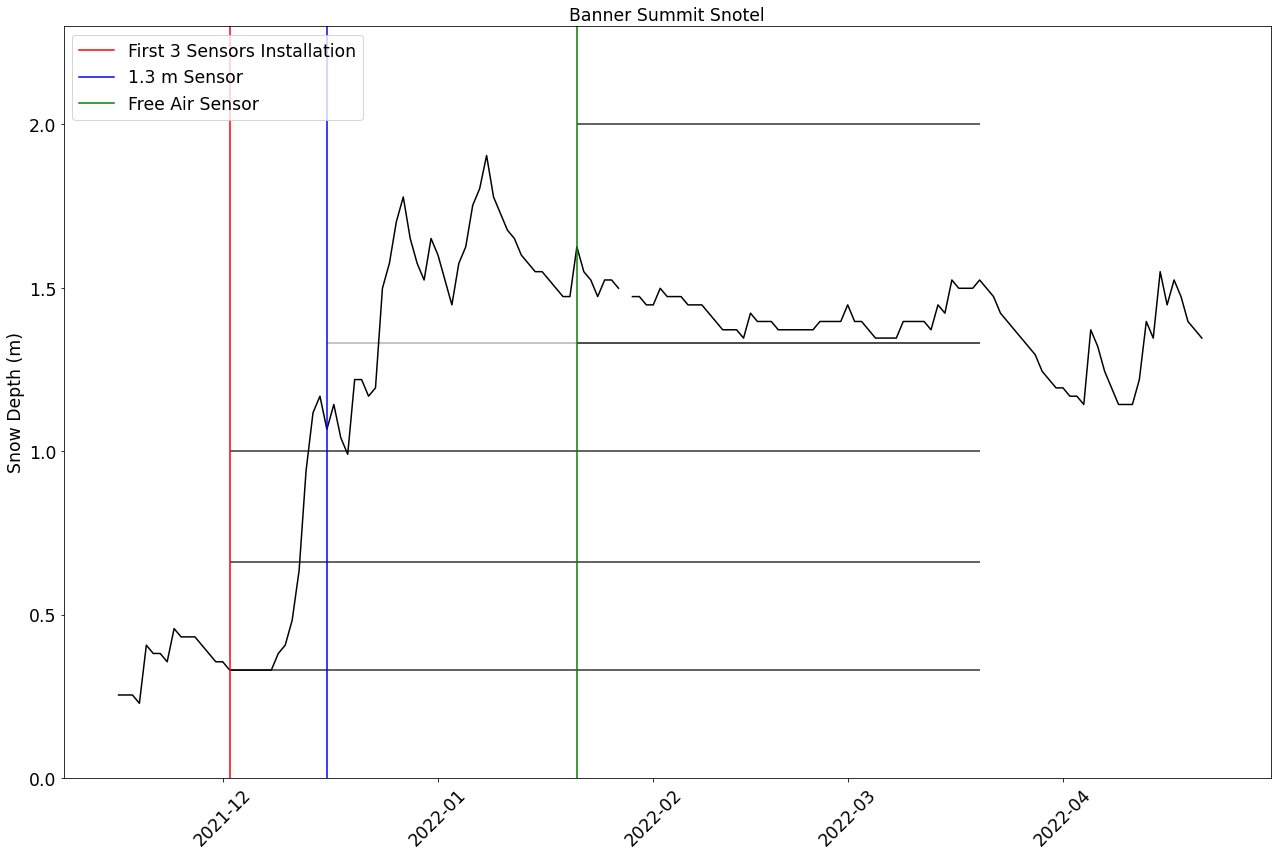

In [31]:
f, ax = plt.subplots(figsize = (18,12))

s = df[['SWE_m','SD_m']].copy()
s.loc[s.SD_m < 0, 'SD_m'] = np.nan
s.loc[(s.SD_m < 1) & (s.index > '2022-01-01'), 'SD_m'] = np.nan 
# s.loc[:,'SD_m'] = s.loc[:,'SD_m'].rolling(5).median()
s = s[s.index>'2021-11-15']
s = s.sort_index()
ax.plot(s.index.values, s.SD_m.values, color = 'black') #, c = s.SWE_m)
ax.set_ylabel('Snow Depth (m)')
ax.hlines([0.33,0.66,1],xmin = pd.to_datetime('2021-12-02'), xmax = pd.to_datetime('2022-03-20'), color = 'black', alpha = 0.8)
ax.hlines([1.33], xmin = pd.to_datetime('2021-12-16'), xmax = pd.to_datetime('2022-03-20'), color = 'black', alpha = 0.3)
ax.hlines([1.33, 2], xmin = pd.to_datetime('2022-01-21'), xmax = pd.to_datetime('2022-03-20'), color = 'black', alpha = 0.8)

# ax.axhline(1.33, color = 'black', alpha = 0.8)
# ax.axhline(2, color = 'black', alpha = 0.8) #, label = 'Sensor Location' )

ax.axvline(pd.to_datetime('2021-12-02'), color = 'red', label = 'First 3 Sensors Installation')
ax.axvline(pd.to_datetime('2021-12-16'), color = 'blue', label = '1.3 m Sensor')
ax.axvline(pd.to_datetime('2022-01-21'), color = 'green', label = 'Free Air Sensor')
# ax.axvline(pd.to_datetime('2021-11-11'), color = 'red', label = 'Installation')


# ax.locator_params(axis = 'x', nbins = 4)
ax.legend(loc = 'upper left')
plt.title('Banner Summit Snotel')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.ylim(0, 2.3)
plt.savefig(join(fig_dir, 'install_date.png'))